| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

![Alt text](../images/01_a_pytorch_workflow.png)

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.0+cu117'

In [3]:
# build some data using linear regression simple equation
# y = weight * X + bias

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)

y = weight * X + bias


X.shape , y.shape

(torch.Size([50]), torch.Size([50]))

In [4]:
X[:5] , y[:5]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560]))

In [5]:
# split the data into training and testing [80 % training] [ 20 % testing]
train_split = int(0.8*len(X))

X_train , X_test = X[:train_split] , X[train_split:]
y_train , y_test = y[:train_split] , y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    '''
    Plot predictions is a function to plot data and if you have a prediction you can compare it to the original data 
    '''
    plt.figure(figsize=(10,7))
    #plot the training data
    plt.scatter(train_data, train_labels,c='b',s=4,label='Training data')
    #plot the testing data
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

    # if i have a prediction
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

    # show the legend 
    plt.legend(prop={"size":14})

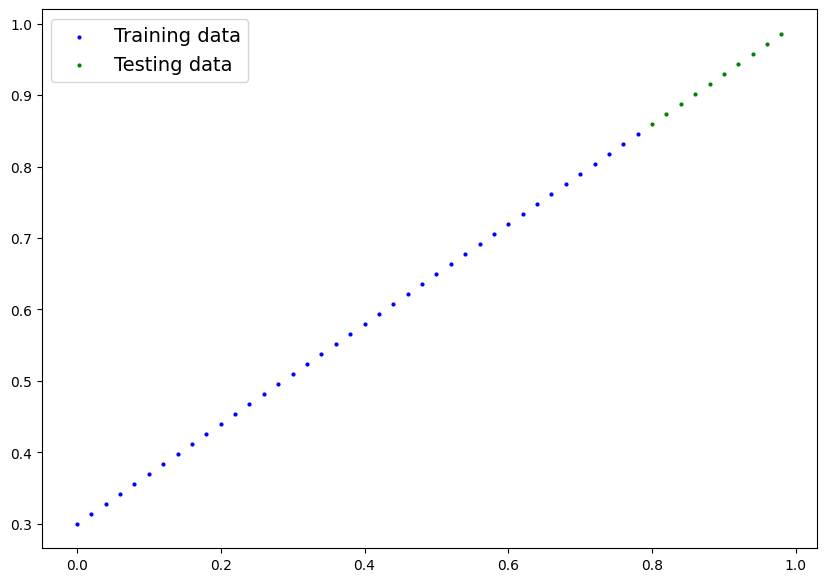

In [7]:
plot_predictions()

# lets build the model

In [8]:
# create a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float), # torch.randn is giving us a random value that we will updates through training to reach the optimal answer
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), # dtype means datatype is the deafult pytorch data type which is float 32
                                requires_grad=True) # requires grad means that the parameter will be updates using gradient descent
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        # y = weight * x + bias
        return self.weights * x + self.bias

In [9]:
# check the content of this model
torch.manual_seed(42)
# create an instance of the model
model_0 = LinearRegressionModel()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### what if we want to plot the output of the model before training on x_test data -> y = weight (0.3367) * x (X_test) + bias (0.1288)

In [12]:
# how to make a prediction using this model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [13]:
print(len(y_preds))
print(len(X_test))

10
10


In [14]:
print(y_preds)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


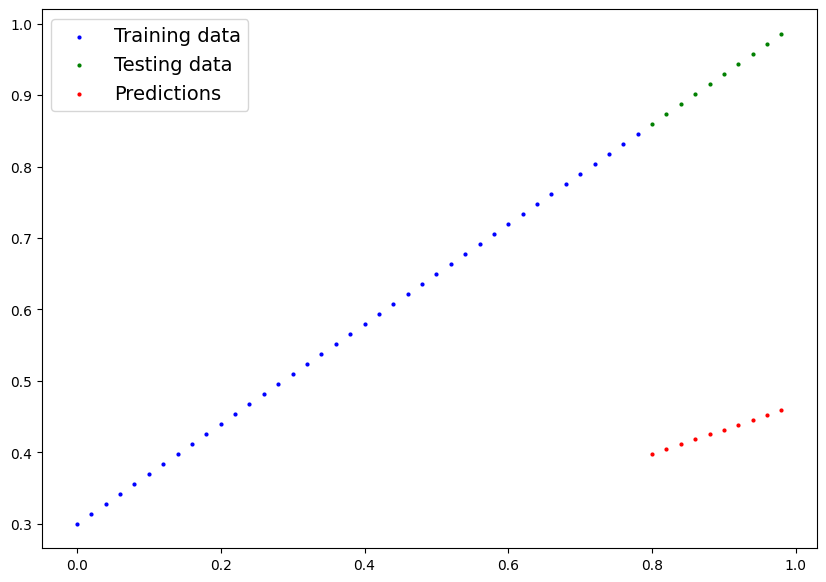

In [15]:
plot_predictions(predictions=y_preds)

# how to train a model ?

1. Right now our model is making predictions using random parameters values 
2. what we want to do is to update the model parameters to reach the optimal parameters

## Creating a loss function and an optimizer

1. loss function : Measures how wrong your models predictions are
2. optimizer : Guides your model to updates the parameters to lower the loss function (learning rate)

![Alt text](../images/loss.png)

In [16]:
# loss function 
loss_fn = nn.L1Loss() # MAE loss function for our model

In [17]:
# lets create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [18]:
torch.manual_seed(42)

epochs = 100

#create some lists to track results

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training
    model_0.train()

        
    # 1. Forward pass

    y_pred = model_0(X_train) # -> (y_pred , y_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)

    # 3. 	Zero gradients
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss
    loss.backward()

    # 5. Update the optimizer (gradient descent)
    optimizer.step()



    # Testing

    # put the model in the evaluation mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        # 2. calculate the test loss
        test_loss = loss_fn(test_pred,y_test)

    # print what's going on
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch : {epoch} | MAE Train loss : {loss} | MAE Testing loss : {test_loss}")

Epoch : 0 | MAE Train loss : 0.31288138031959534 | MAE Testing loss : 0.48106518387794495
Epoch : 10 | MAE Train loss : 0.1976713240146637 | MAE Testing loss : 0.3463551998138428
Epoch : 20 | MAE Train loss : 0.08908725529909134 | MAE Testing loss : 0.21729660034179688
Epoch : 30 | MAE Train loss : 0.053148526698350906 | MAE Testing loss : 0.14464017748832703
Epoch : 40 | MAE Train loss : 0.04543796554207802 | MAE Testing loss : 0.11360953003168106
Epoch : 50 | MAE Train loss : 0.04167863354086876 | MAE Testing loss : 0.09919948130846024
Epoch : 60 | MAE Train loss : 0.03818932920694351 | MAE Testing loss : 0.08886633068323135
Epoch : 70 | MAE Train loss : 0.03476089984178543 | MAE Testing loss : 0.0805937647819519
Epoch : 80 | MAE Train loss : 0.03132382780313492 | MAE Testing loss : 0.07232122868299484
Epoch : 90 | MAE Train loss : 0.02788739837706089 | MAE Testing loss : 0.06473556160926819


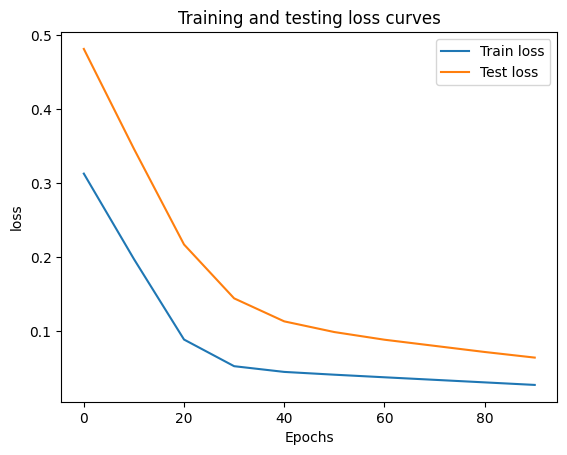

In [19]:
# plot the loss curves
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

In [20]:
# new weight | new bias  
# -> old values before training ('weights', tensor([0.3367])), ('bias', tensor([0.1288])
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

# we are going to make predictions which is called [inference]

1. putting the model to eval mode -> evaluation mode
2. with torch.inference_mode()
3. make sure you model and your data are on the same device (GPU - CPU)  

In [21]:
model_0.eval()

with torch.inference_mode():
    y_pred_train = model_0(X_test)

In [22]:
y_pred_train , y_pred_train.shape

(tensor([0.8141, 0.8256, 0.8372, 0.8488, 0.8603, 0.8719, 0.8835, 0.8950, 0.9066,
         0.9182]),
 torch.Size([10]))

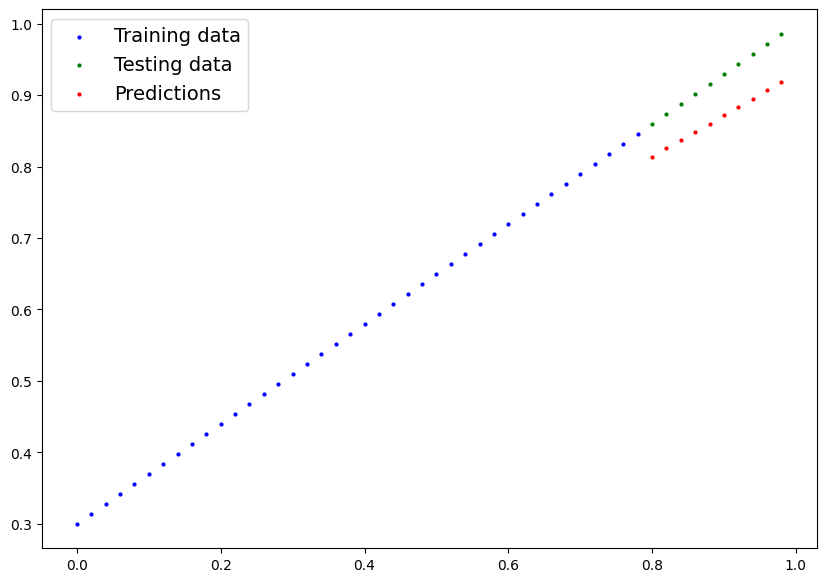

In [23]:
plot_predictions(predictions=y_pred_train)

# how to save and load a pytorch model ?

1. torch.save
2. torch.load


In [24]:
# pytorch model extensions -> pt / pth
torch.save(model_0,'./model-0.pt')   

In [25]:
torch.save(model_0,'./model-1.pth')

In [26]:
from pathlib import Path

# create a directory 
MODEL_PATH = Path('models')

MODEL_PATH.mkdir(parents=True,exist_ok=True)

# create model save path
MODEL_NAME = '01-workflow-model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

# Loading models

In [27]:
# torch.nn.Module.load_state_dict

# instance of our model
torch.manual_seed(12)

model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([-0.2138])), ('bias', tensor([-1.3780]))])

In [28]:
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [30]:
model_1.eval()
with torch.inference_mode():
    y_pred_2 = model_1(X_test) 

In [31]:
y_pred_train == y_pred_2

tensor([True, True, True, True, True, True, True, True, True, True])

# lets level up our game a bit
1. fully connected network

    ![Alt text](../images/Capture.JPG)

### What do i want to do ?
now i have some data and i want to make a model that predicts this data

In [32]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

In [33]:
X.shape , y.shape 

((200,), (200,))

In [34]:
X[0] , y[0]

(0.0, 0.5592078627619969)

<Axes: >

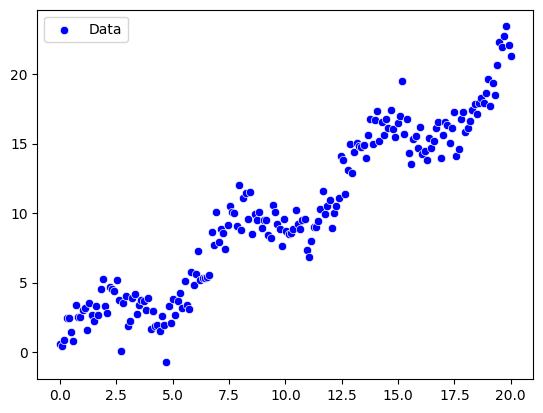

In [35]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [36]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)  

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)
    
    def __len__(self):
        return self.X.shape[0]

In [37]:
df = Simple1DRegressionDataset(X,y)

In [38]:
df[0]

(tensor([0.]), tensor([0.5592]))

In [39]:
# lets make a dataloader for the dataset
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [40]:
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[10.0562]])]

In [41]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)

In [42]:
# loss function 
loss_fn = nn.MSELoss()

In [43]:
# optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [44]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):
    
    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):
        
        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):
            
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()

    

C:\Users\Amr osama abdellatif\AppData\Local\Temp\ipykernel_27368\1530387542.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [46]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )

Epochs: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


In [47]:
X.shape

(200,)

In [48]:
# lets try our model 
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

    

In [49]:
y_pred_m2.shape

(200, 1)

# ravel function for numpy arrays is like reshape for tensors

<Axes: >

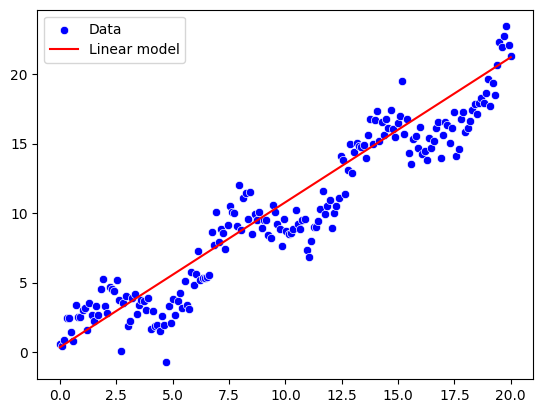

In [50]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')

In [55]:
# nn.Linear() , nn.Linear()
# in_feature = 1 , out_features = 1

# nn.Linear(1, 5 , 1)

model_3 = nn.Sequential(
    nn.Linear(1,5),
    nn.Linear(5,1),
) 

In [56]:
train_simple_network(model_3,loss_fn,training_loader)

Epochs: 100%|██████████| 5/5 [00:00<00:00,  7.68it/s]


In [57]:
model_3.to('cpu')
model_3.eval()
with torch.inference_mode():
    y_pred_m3 = model_3(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

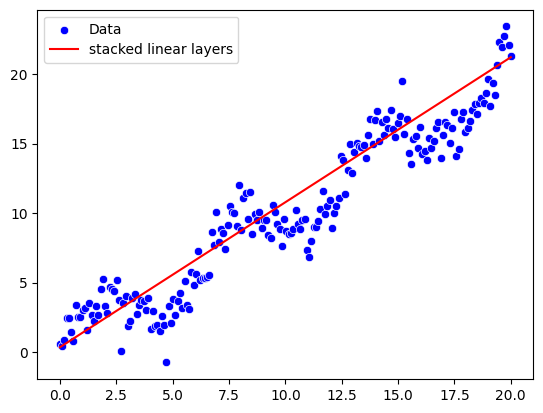

In [59]:
sns.scatterplot(x=X,y=y,color="blue",label="Data")
sns.lineplot(x=X,y=y_pred_m2.ravel(),color="red",label="stacked linear layers")

In [60]:
model_4 = nn.Sequential(
    nn.Linear(1,10),
    nn.Tanh(),
    nn.Linear(10,1)
)

In [65]:
train_simple_network(model_4,loss_fn,training_loader,epochs=100)

Epochs: 100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


In [66]:
model_4.to('cpu')
model_4.eval()
with torch.inference_mode():
    y_pred_m4 = model_4(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

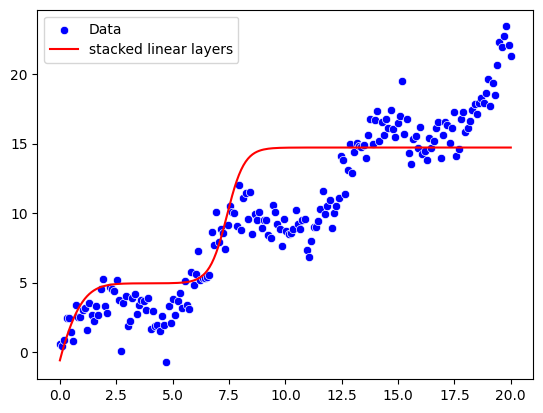

In [67]:
sns.scatterplot(x=X,y=y,color="blue",label="Data")
sns.lineplot(x=X,y=y_pred_m4.ravel(),color="red",label="stacked linear layers")